![dance party](dance_party.jpg)

# Which songs are most suitable for a dancing party?

## 📖 Background
It's that vibrant time of year again - Summer has arrived (for those of us in the Northern Hemisphere at least)! There's an energy in the air that inspires us to get up and move. In sync with this exuberance, your company has decided to host a dance party to celebrate. And you, with your unique blend of creativity and analytical expertise, have been entrusted with the crucial task of curating a dance-themed playlist that will set the perfect mood for this electrifying night. The question then arises - How can you identify the songs that would make the attendees dance their hearts out? This is where your coding skills come into play.

## 💾 The Data
You have assembled information on more than `125` genres of Spotify music tracks in a file called `spotify.csv`, with each genre containing approximately `1000` tracks. All tracks, from all time, have been taken into account without any time period limitations. However, the data collection was concluded in `October 2022`.
Each row represents a track that has some audio features associated with it.

| Column     | Description              |
|------------|--------------------------|
| `track_id` | The Spotify ID number of the track. |
| `artists` | Names of the artists who performed the track, separated by a `;` if there's more than one.|
| `album_name` | The name of the album that includes the track.|
| `track_name` | The name of the track.|
| `popularity` | Numerical value ranges from `0` to `100`, with `100` being the highest popularity. This is calculated based on the number of times the track has been played recently, with more recent plays contributing more to the score. Duplicate tracks are scored independently.|
| `duration_ms` | The length of the track, measured in milliseconds.|
| `explicit` | Indicates whether the track contains explicit lyrics. `true` means it does, `false` means it does not or it's unknown.|
| `danceability` | A score ranges between `0.0` and `1.0` that represents the track's suitability for dancing. This is calculated by algorithm and is determined by factors like tempo, rhythm stability, beat strength, and regularity.|
| `energy` | A score ranges between `0.0` and `1.0` indicating the track's intensity and activity level. Energetic tracks tend to be fast, loud, and noisy.|
| `key` | The key the track is in. Integers map to pitches using standard Pitch class notation. E.g.`0 = C`, `1 = C♯/D♭`, `2 = D`, and so on. If no key was detected, the value is `-1`.| 
| `loudness` | The overall loudness, measured in decibels (dB).|
| `mode` |  The modality of a track, represented as `1` for major and `0` for minor.| 
| `speechiness` | Measures the amount of spoken words in a track. A value close to `1.0` denotes speech-based content, while `0.33` to `0.66` indicates a mix of speech and music like rap. Values below `0.33` are usually music and non-speech tracks.| 
| `acousticness` | A confidence measure ranges from `0.0` to `1.0`, with `1.0` representing the highest confidence that the track is acoustic.|
| `instrumentalness` | Instrumentalness estimates the likelihood of a track being instrumental. Non-lyrical sounds such as "ooh" and "aah" are considered instrumental, whereas rap or spoken word tracks are classified as "vocal". A value closer to `1.0` indicates a higher probability that the track lacks vocal content.|
| `liveness` | A measure of the probability that the track was performed live. Scores above `0.8` indicate a high likelihood of the track being live.|
| `valence` | A score from `0.0` to `1.0` representing the track's positiveness. High scores suggest a more positive or happier track.|
| `tempo` | The track's estimated tempo, measured in beats per minute (BPM).|
| `time_signature` | An estimate of the track's time signature (meter), which is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from `3` to `7` indicating time signatures of `3/4`, to `7/4`.|
| `track_genre` |  The genre of the track.|

[Source](https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset) (data has been modified)

In [1]:
#Install the libraries we need

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings 
warnings.filterwarnings('ignore')

In [2]:
#Let's view our dataset

spotify = pd.read_csv('data/spotify.csv')
spotify

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666.0,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610.0,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826.0,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933.0,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853.0,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113022,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999.0,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113023,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000.0,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113024,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466.0,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113025,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893.0,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


# Data Set Structure

In [3]:
spotify.shape

#Our dataset consists of 113027 rows and 20 columns.

(113027, 20)

In [4]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113027 entries, 0 to 113026
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          113027 non-null  object 
 1   artists           113026 non-null  object 
 2   album_name        113026 non-null  object 
 3   track_name        113026 non-null  object 
 4   popularity        113027 non-null  int64  
 5   duration_ms       113027 non-null  float64
 6   explicit          113027 non-null  bool   
 7   danceability      113027 non-null  float64
 8   energy            113027 non-null  float64
 9   key               113027 non-null  int64  
 10  loudness          113027 non-null  float64
 11  mode              113027 non-null  int64  
 12  speechiness       113027 non-null  float64
 13  acousticness      113027 non-null  float64
 14  instrumentalness  113027 non-null  float64
 15  liveness          113027 non-null  float64
 16  valence           11

We see that there is a blank value in the artists, album_name, strack_name columns in the data set, we will remove it. We see that there is no problem with the data types.

In [5]:
#It will be enough to remove the empty values in the artists column.
df_spotify=spotify.dropna(subset=['artists'], inplace=True)

In [6]:
#Delete duplicate values.
unique_track_id_count = spotify['track_id'].nunique()
print("Total number of unique track_ids:", unique_track_id_count)


Total number of unique track_ids: 88894


The track_id value had to be unique. We remove duplicate values.

In [7]:
#Delete duplicate values.
df_spotify = spotify.drop_duplicates(subset='track_id', keep='first')

In [8]:
#We reset the index of our edited data set.
df_spotify.reset_index(drop=True, inplace=True)

In [9]:
#Our edited dataset
df_spotify

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666.0,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610.0,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826.0,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933.0,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853.0,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88889,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999.0,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
88890,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000.0,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
88891,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466.0,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
88892,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893.0,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


In [10]:
#To better understand and examine the basic statistical properties of our data set:
df_spotify.describe().T

,count,mean,std,min,25%,50%,75%,max
popularity,88894.0,33.247193,20.587626,0.000,19.00000,33.000000,49.00000,100.000
duration_ms,88894.0,229381.612584,112754.412012,8586.000,173333.00000,213498.500000,264420.50000,5237295.000
danceability,88894.0,0.563563,0.176055,0.000,0.45200,0.577000,0.69300,0.985
energy,88894.0,0.636126,0.255455,0.000,0.46000,0.678000,0.85400,1.000
key,88894.0,5.286532,3.561195,0.000,2.00000,5.000000,8.00000,11.000
loudness,88894.0,-8.455255,5.172547,-49.531,-10.27575,-7.159000,-5.09700,4.532
mode,88894.0,0.636668,0.480962,0.000,0.00000,1.000000,1.00000,1.000
speechiness,88894.0,0.087010,0.111667,0.000,0.03600,0.048900,0.08580,0.965
acousticness,88894.0,0.325731,0.336919,0.000,0.01700,0.185000,0.61900,0.996
instrumentalness,88894.0,0.172038,0.322653,0.000,0.00000,0.000057,0.09230,1.000


In [11]:
#The 10 songs with the highest danceability value:
top_10_danceability_tracks=df_spotify[["danceability", "track_name"]].sort_values(by="danceability", ascending=False)[:10]
top_10_danceability_tracks

,danceability,track_name
86752,0.985,Sol Clap
55960,0.984,Medicaid Baby
23298,0.983,Inspiration
60568,0.982,Daily Routines
12408,0.981,Bitches
56165,0.981,"Featuring Mixx Master Lee, Red Rum & J. Smoov ..."
74045,0.980,Dancing in My Room
12200,0.980,Plastik Fantastik
12094,0.979,The Underground - Hatiras Remix
13169,0.979,The Soccer Song (Football Song)


Distributions of numeric variables in the data frame:


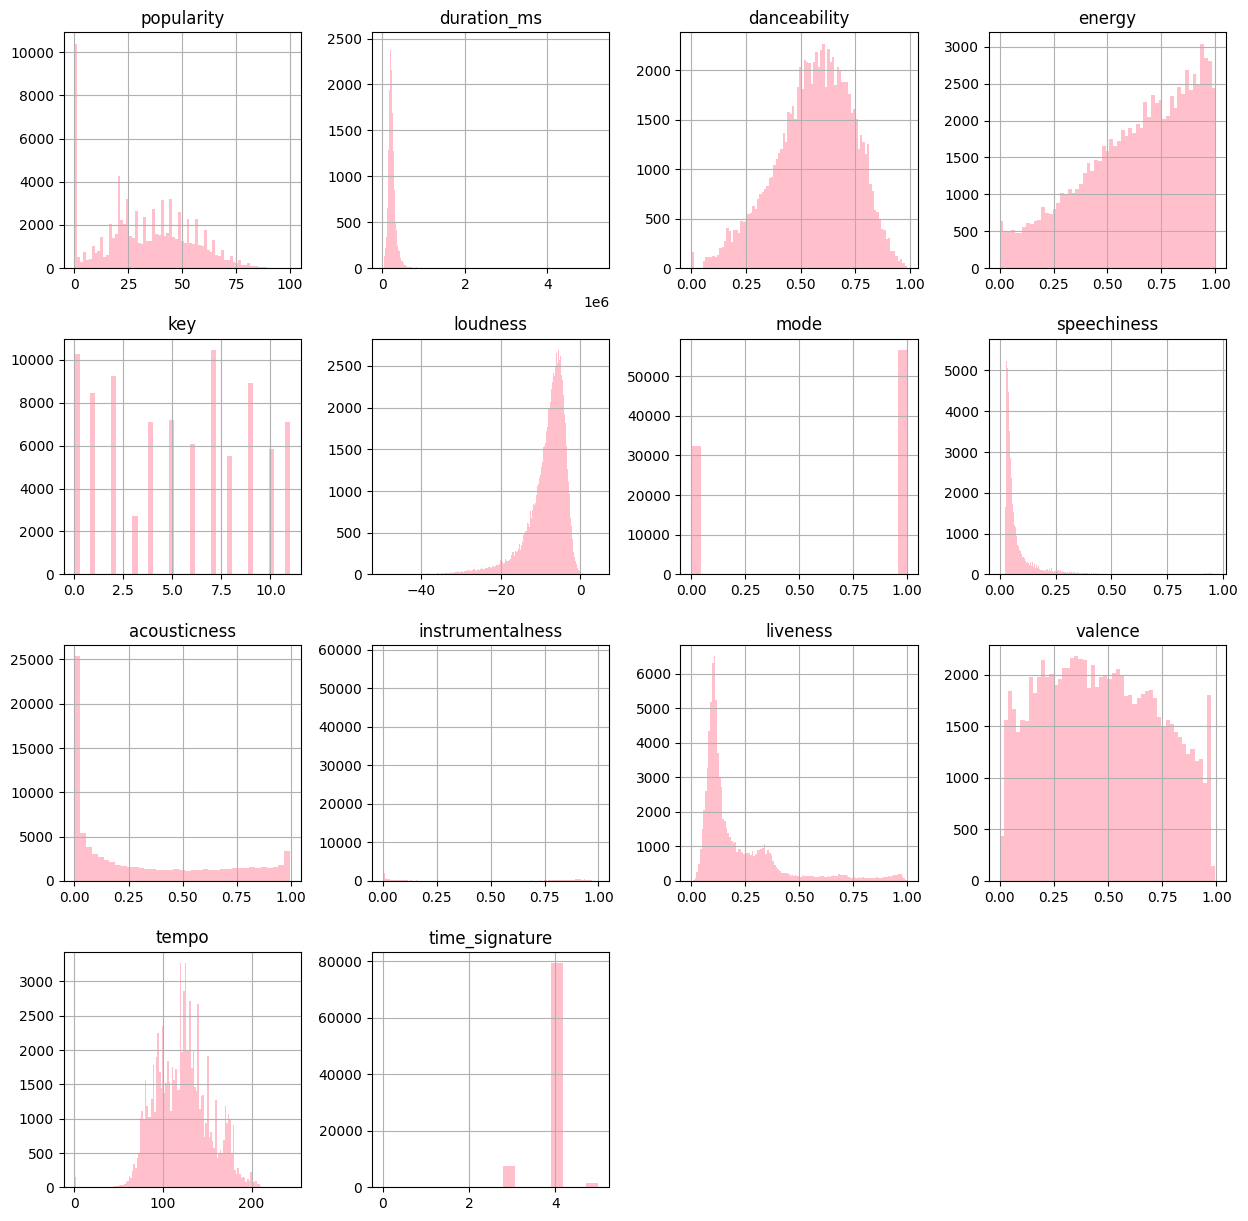

In [12]:
#How are the relationships between the variables?
print("Distributions of numeric variables in the data frame:")
df_spotify.hist(bins = "auto", figsize = (15,15), color="pink");

-The danceability value of the majority of the songs is between 0.5-07.

-We can observe that acoustincess, duration, instrumentalness, liveness, popularity, and speechiness are right skewed. A distribution skewed to the right indicates that the majority of data points are at low values and there are long tails on the right side of the distribution. That is, most of these variables have low values, but some observations have high values.

-Energy, loudness and danceability are skewed to the left. A distribution skewed to the left indicates that the majority of data points are at high values and there are long tails on the left side of the distribution. That is, most of these variables have high values, but some observations have low values.

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

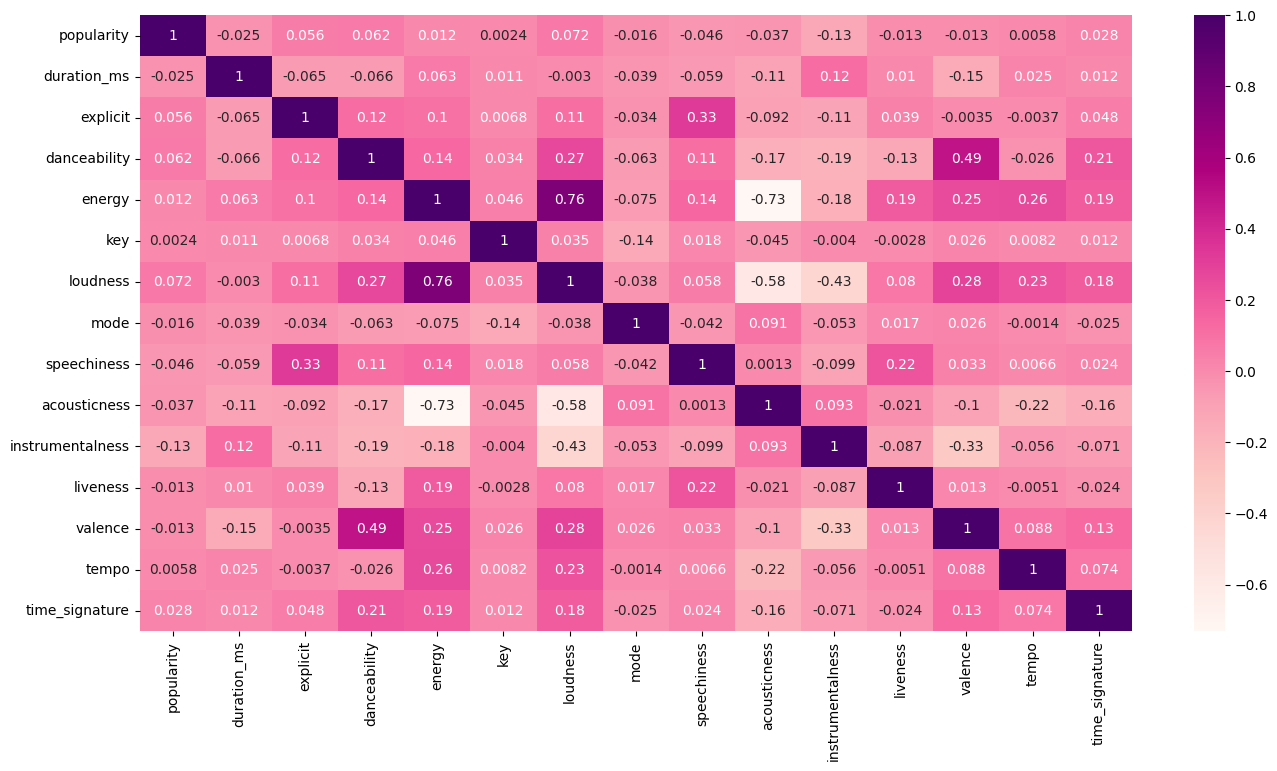

In [13]:
#Let's look at correlation.
df_spotify.corr()
#Let's plot correlation on the heat map.
plt.figure(figsize=(16,8))
sb.heatmap(df_spotify.corr(), annot=True, cmap='RdPu')
plt.plot


-There is a nice correlation between energy and loudness. This means that if loudness increases, energy also increases, and if it decreases, it decreases.

-There is a moderate positive correlation between danceability and valance.

-There is a high negative correlation between acoustincess and energy. They do not tend to act together. If one increases, the other decreases. If one decreases, the other increases.

# Model Selection

In [14]:
#We install the necessary libraries for our model.
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [15]:
# Separating independent variables (X) and dependent variable (y)
x = df_spotify.drop(['track_id', 'album_name', 'artists','track_name','danceability','track_genre'],axis=1)
y = df_spotify['danceability'].values.reshape(-1, 1)

# Separate training and test datasets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)


In [16]:
#We test how well regression models will work on our data set.
models = {
    "                         Lineer Regression": LinearRegression(),
    "                         Decision Tree": DecisionTreeRegressor(),
    "                         Random Forest": RandomForestRegressor(),
    "                     Gradient Boosting": GradientBoostingRegressor()
}
for name, model in models.items():
    model.fit(x_train, y_train)
for name, model in models.items():
    print(name + ": {:.2f}%".format(model.score(x_test, y_test) * 100))

                         Lineer Regression: 35.81%
                         Decision Tree: 28.37%
                         Random Forest: 65.14%
                     Gradient Boosting: 57.52%


The above code calculates the R-squared scores on the test data for all four models and prints them to the screen. The R-squared score measures how much of the variance of the dependent variable "danceability" is explained. That is, which model has a higher R-squared value indicates which model fits the data best. The model that best suits our study is the Random Forest Regression model.

# Model Training

In [17]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Model training
rf.fit(x_train, y_train)

# Make predictions
y_pred = rf.predict(x_test)

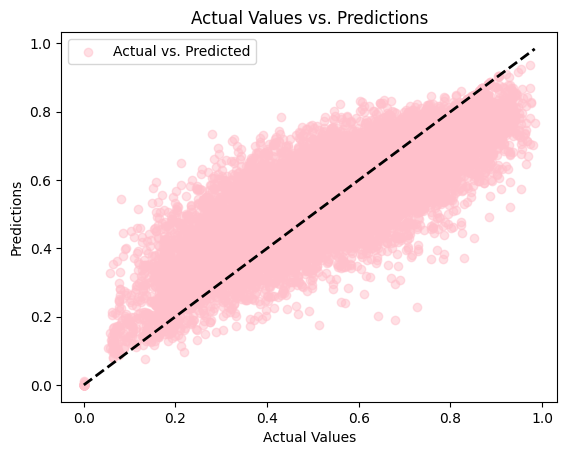

In [18]:
# Color the actual and predicted values on a scatter plot
plt.scatter(y_test, y_pred, c='pink', label='Actual vs. Predicted', alpha=0.5)

# Add a 45-degree line (line of equality between actual and predicted values)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)

plt.xlabel('Actual Values')
plt.ylabel('Predictions')
plt.title('Actual Values vs. Predictions')

# Show the legend
plt.legend()

# Show the plot
plt.show()


Shows the difference between actual values and predicted values in a bubble chart and adds a 45-degree black line (along which the actual and predicted values are the same). This way, we can better visualize the difference between actual and predicted values.

In [19]:
# Create a DataFrame containing predicted danceability values and set indexes
predicted_df = pd.DataFrame({'predicted_danceability': y_pred}, index=x_test.index)

In [20]:
# Combine data frame and predictions
merged_df = df_spotify.merge(predicted_df, left_index=True, right_index=True)

In [21]:
sorted_df = merged_df.sort_values(by='predicted_danceability', ascending=False)

In [22]:
# Sort by estimated danceability value
sorted_df = merged_df.sort_values(by='predicted_danceability', ascending=False)

# Select top 50 songs
top_50_songs = sorted_df.head(50)

# My playlist for the dance party:

In [23]:
# Create the results as a DataFrame using the top_50_songs dataframe
result_df = top_50_songs[['track_name', 'artists', 'album_name', 'predicted_danceability','danceability']]

result_df

,track_name,artists,album_name,predicted_danceability,danceability
56220,Cha Cha Slide,Chicken Dance Mix DJ's,CHICKEN DANCE PARTY,0.93637,0.974
55948,The Lego Super Mario Song,Poop Emoji,Best Nintendo Music,0.92407,0.954
20237,Mek It Bunx Up,DeeWunn;Marcy Chin,Mek it Bunx Up (feat. Marcy Chin) - Single,0.91561,0.947
19274,Budget,Megan Thee Stallion;Latto,Summer Music Festival Hits,0.91042,0.922
45209,First Class,Jack Harlow,On Chill - Rap & RnB,0.90500,0.905
45265,First Class,Jack Harlow,Trending Pop,0.90500,0.905
45240,First Class,Jack Harlow,For the Girls: Summer Hits,0.90500,0.905
56483,Qué Más Pues?,J Balvin;Maria Becerra,Halloween 2022 Perreo Vol. 4,0.90400,0.904
55884,Maxi Ford,Christopher Zondaflex Tyler,Mr. Chris' Tap Music for Kids,0.90302,0.928
56484,Qué Más Pues?,J Balvin;Maria Becerra,El perreo es el futuro,0.90126,0.904


This project started with the goal of creating a 50-song playlist for a dance party. As a first step, we explored the dataset in detail, then selected an appropriate regression model and applied this model to the data. As a result, we created a music playlist using 'danceability' predictions.